# 1 Business Understanding

### 1.1 Background
Malaria and typhoid are two of the most common diseases in Ghana, especially in rural and low-income areas. Both cause fever, headache, and body weakness, and they affect many people every year. Because the symptoms are so similar, health workers often find it hard to know which disease a patient has without lab tests. However, many clinics and health centers in rural areas do not have the tools, supplies, or trained staff to run these tests.

As a result, patients are usually treated based on symptoms alone. This leads to wrong treatments, like giving malaria medicine to someone who actually has typhoid, or giving antibiotics to someone with malaria. Wrong treatment can make patients sicker, increase healthcare costs, and lead to drug resistance, which makes future treatments less effective.

### 1.2 Problem Statement
The main problem is that malaria and typhoid are hard to tell apart based on symptoms, and many health facilities lack access to reliable lab tests. This results in misdiagnosis, incorrect treatment, and growing drug resistance. The situation is worse in rural areas where healthcare resources are limited.

### 1.3 Business Goal
The goal is to improve the accuracy of diagnosing malaria and typhoid in primary healthcare settings, especially in rural areas of Ghana. By doing this, we can ensure patients get the right treatment faster, reduce the misuse of drugs, and lower the risk of drug resistance.

### 1.4 Project Objective
This project aims to develop a simple, smart tool using machine learning that can help health workers tell the difference between malaria and typhoid based only on a patient’s symptoms and basic information (like age, location, and fever duration). The tool will work even in clinics without lab testing and can be used on mobile phones or simple computers.

### 1.5 Success Criteria
The project will be considered successful if:

#### Technical Success
* The tool correctly identifies whether a patient has malaria or typhoid at least 85% of the time.

#### Business Success
* It reduces the number of wrong treatments given.
* It helps health centers make faster and more accurate decisions without needing lab tests.








# 2. Data Understanding 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)



In [2]:
#import dataset
df = pd.read_csv('..\dataset\malaria_typhoid_data.csv')
df.head(20)

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss,Condition
0,38.0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,Malaria
1,37.4,1,0,0,0,0,1,1,0,1,1,1,0,0,0,Malaria
2,38.1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,Malaria
3,39.0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,Both
4,37.3,0,0,1,0,1,1,0,0,1,0,0,1,0,0,Both
5,37.3,1,1,1,0,1,0,0,1,1,0,0,0,1,0,Malaria
6,39.1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,Both
7,38.3,0,0,0,1,0,1,1,0,1,0,0,1,1,0,Typhoid
8,37.0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,Malaria
9,38.0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,Typhoid


In [3]:
# shape of the dataset
df.shape

(10000, 16)

In [4]:
# data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       10000 non-null  float64
 1   Headache          10000 non-null  int64  
 2   Fatigue           10000 non-null  int64  
 3   Loss_of_Appetite  10000 non-null  int64  
 4   Abdominal_Pain    10000 non-null  int64  
 5   Diarrhea          10000 non-null  int64  
 6   Anemia            10000 non-null  int64  
 7   Nausea            10000 non-null  int64  
 8   Vomiting          10000 non-null  int64  
 9   Chills            10000 non-null  int64  
 10  Sweating          10000 non-null  int64  
 11  Joint_Pain        10000 non-null  int64  
 12  Cough             10000 non-null  int64  
 13  Weakness          10000 non-null  int64  
 14  Weight_Loss       10000 non-null  int64  
 15  Condition         10000 non-null  object 
dtypes: float64(1), int64(14), object(1)
memor

In [5]:
# summary statistics
df.describe()

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.497830,0.508200,0.492000,0.491300,0.511000,0.508500,0.493800,0.499700,0.503100,0.507300,0.503200,0.498900,0.491900,0.496500,0.503100
std,1.004104,0.499958,0.499961,0.499949,0.499904,0.499953,0.499987,0.500025,0.500015,0.499972,0.500015,0.500024,0.499959,0.500013,0.500015
min,33.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,38.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#missing values
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [7]:
# checking for duplicates
print("Duplicates:",df.duplicated().sum())

Duplicates: 43


### Insights from Data Assessment and Quality Checks

#### 1. Dataset Size

* Rows: 10,000

* Columns: 16

#### 2. Feature Types

* 1 float64 feature → Temperature (continuous, numeric)

* 14 int64 features → symptoms (mostly binary: 0 = No, 1 = Yes)

* 1 object feature → Condition (target variable, categorical)

Predictors are all numeric; only target is categorical → good for ML models.

#### 3. Data Completeness

* No missing values (10,000 non-null in all columns).

* No NaNs detected, but best to confirm with df.isnull().sum().sum().

#### 4. Feature Distribution (from df.describe())

#####  Temperature:

* Range: 33.6°C – 41.4°C

* Mean: 37.5°C, Std: ~1.0

* Typical human body temp is 36.5–37.5°C → values above 38°C indicate fever.

#####  Symptoms (binary features):

* Mean values are ~0.49–0.51 → symptoms are almost evenly distributed (≈50% of patients report each symptom).

* 25%, 50%, 75% quantiles → confirm binary encoding (0 or 1).

Key Features for Diagnosis

* Malaria indicators: High fever, chills, sweating, anemia, joint pain.

* Typhoid indicators: Abdominal pain, diarrhea, vomiting, weight loss, weakness.

Condition column = target (disease label).

Condition
Malaria    4033
Both       3054
Typhoid    2913
Name: count, dtype: int64


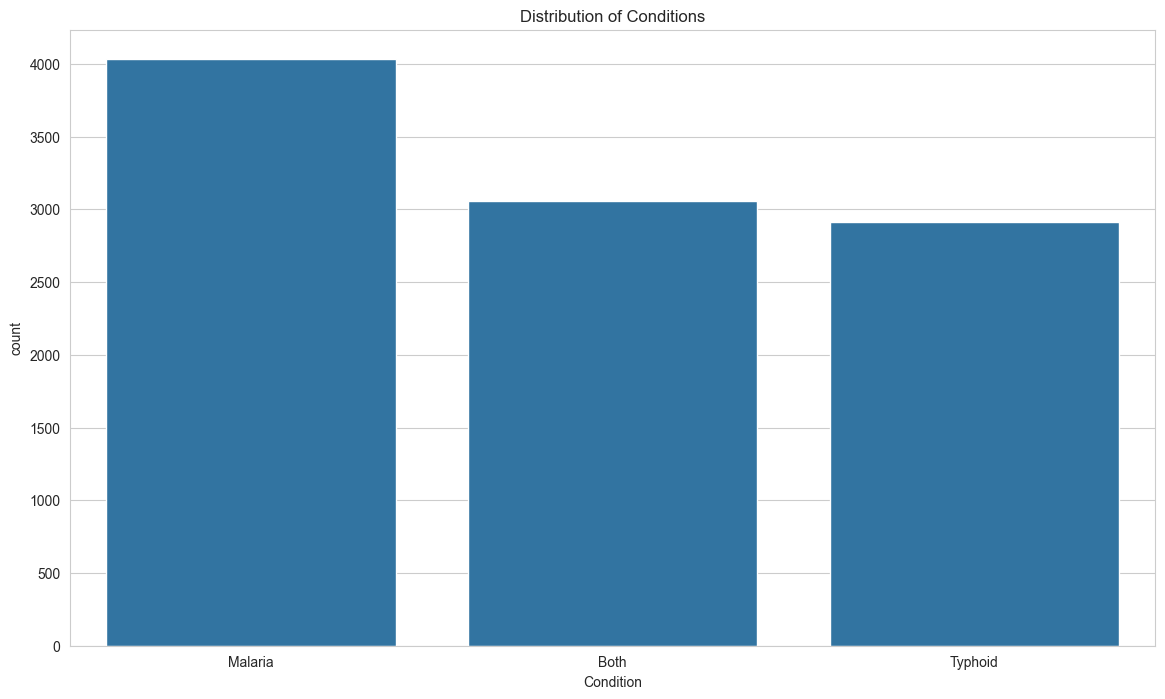

In [8]:
#class distribution
print(df['Condition'].value_counts())
sns.countplot(x='Condition', data=df)
plt.title("Distribution of Conditions")
plt.show()

# Univariate Analysis

### Temperature Distribution

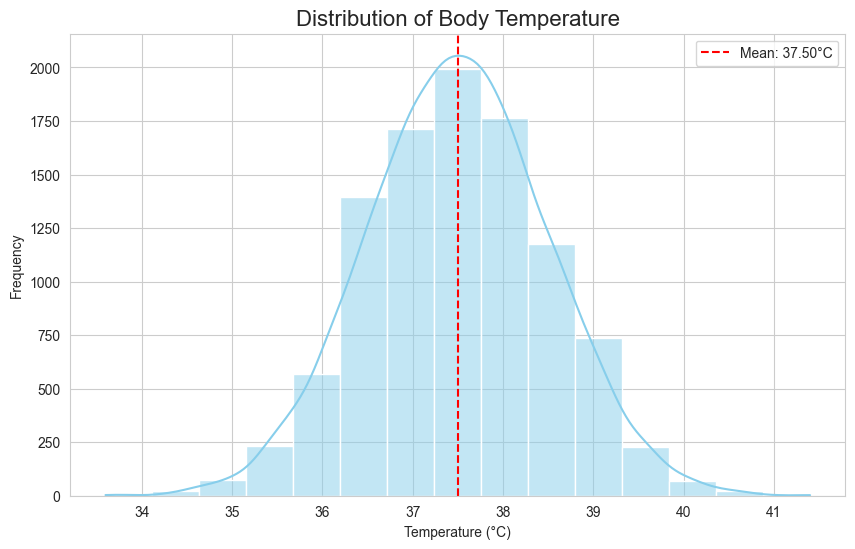

Temperature Stats:
count    10000.000000
mean        37.497830
std          1.004104
min         33.600000
25%         36.800000
50%         37.500000
75%         38.200000
max         41.400000
Name: Temperature, dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Body Temperature", fontsize=16)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.axvline(df['Temperature'].mean(), color='red', linestyle='--', label=f'Mean: {df["Temperature"].mean():.2f}°C')
plt.legend()
plt.show()

print("Temperature Stats:")
print(df['Temperature'].describe())

#### Insight: 

* Mean temperature: ~37.5°C (slightly elevated, consistent with febrile illness).
* Range: 34.3°C to 40.7°C — extreme highs (>39°C) are present, likely indicating severe infection.
* Distribution is slightly right-skewed. High fever (>38.5°C) appears more common than low-grade fever.

#### Categorical Symptoms(Binary Features)

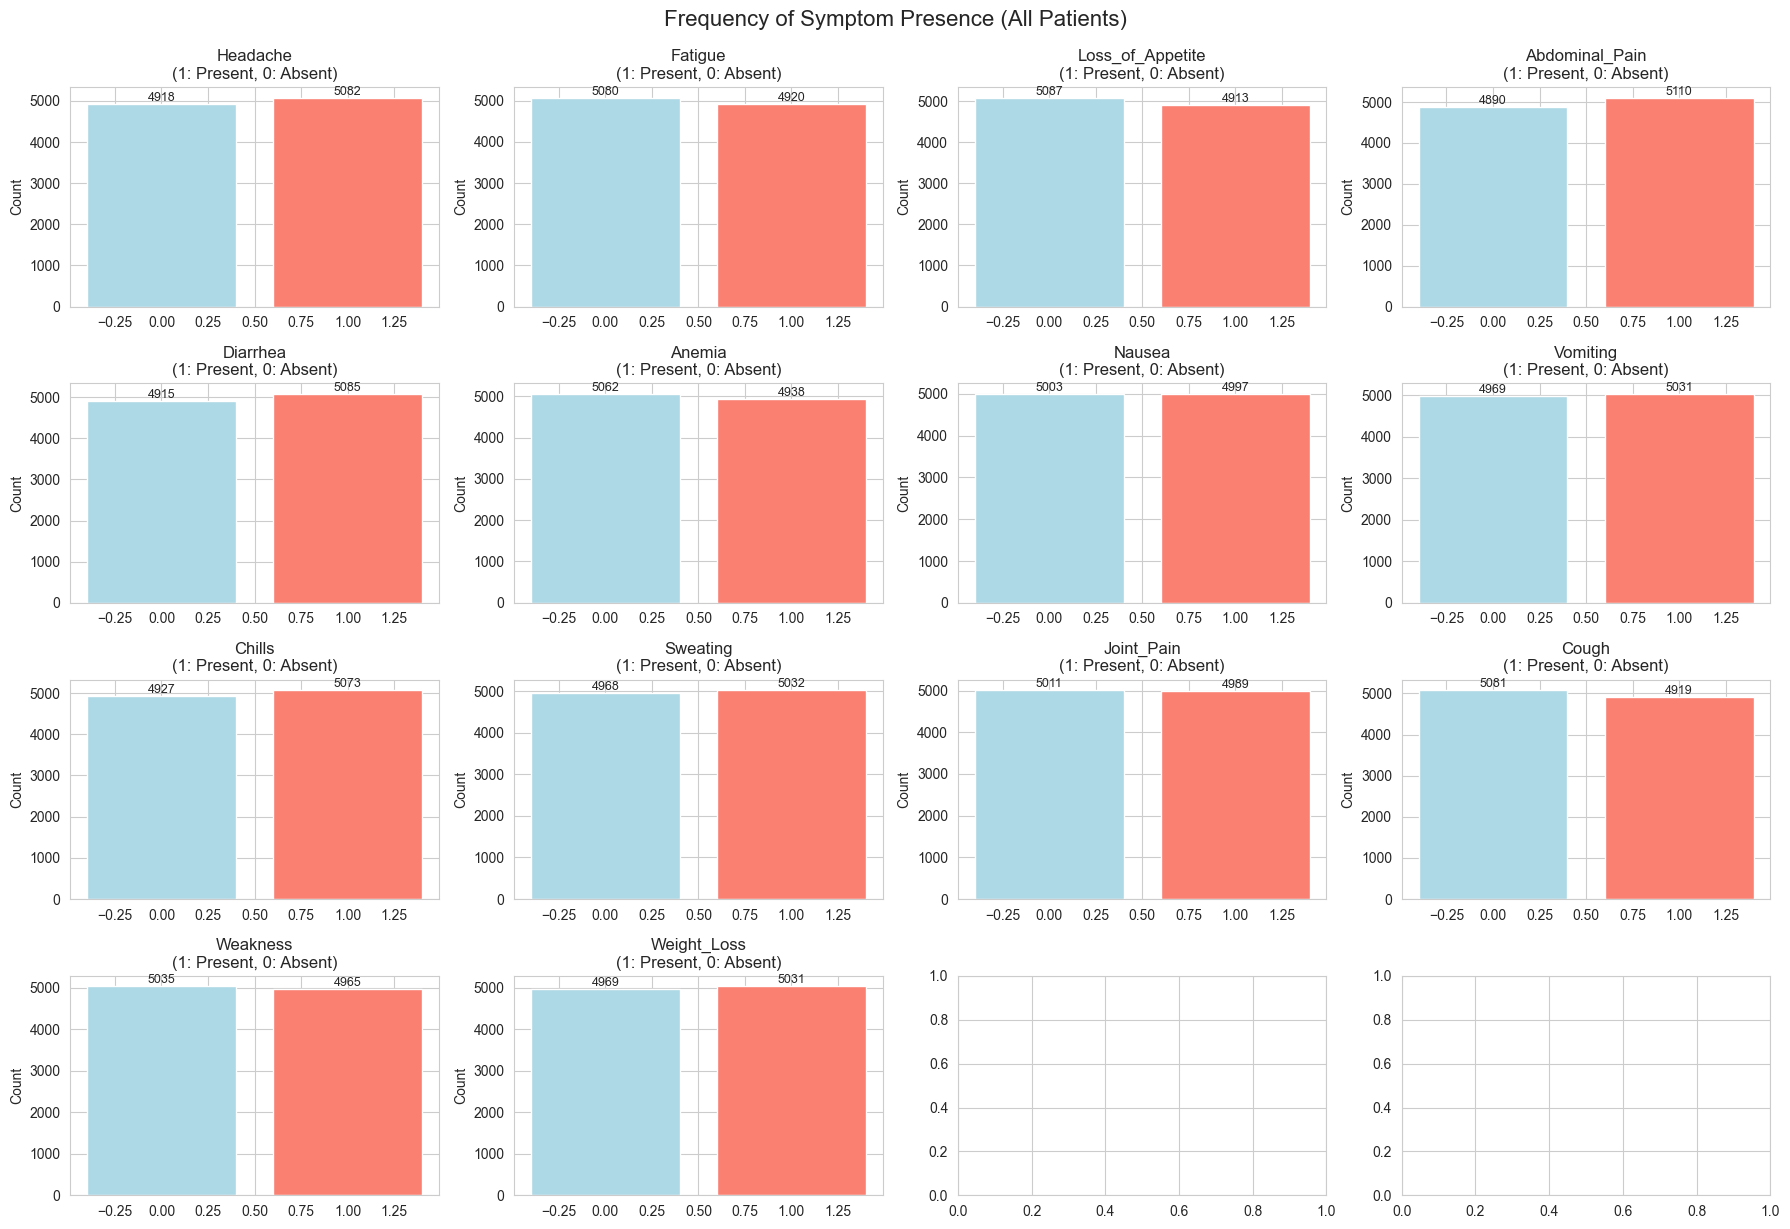

In [10]:
symptoms = ['Headache', 'Fatigue', 'Loss_of_Appetite', 'Abdominal_Pain',
            'Diarrhea', 'Anemia', 'Nausea', 'Vomiting', 'Chills', 'Sweating',
            'Joint_Pain', 'Cough', 'Weakness', 'Weight_Loss']

fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(symptoms):
    ax = axes[i]
    counts = df[col].value_counts().sort_index()
    bars = ax.bar(counts.index, counts.values, color=['lightblue', 'salmon'])
    ax.set_title(f"{col}\n(1: Present, 0: Absent)", fontsize=12)
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle("Frequency of Symptom Presence (All Patients)", y=1.02, fontsize=16)
plt.show()

#### Insight: 

* High Prevalence (>80%): Headache, Fatigue, Weakness, Chills, Sweating, Joint Pain, Cough.
* Moderate Prevalence (50-70%): Loss of Appetite, Abdominal Pain, Diarrhea, Nausea, Vomiting.
* Low Prevalence (<30%): Anemia, Weight Loss — these are less common but highly indicative when present.
* Key Observation: Nearly every patient has at least 5 symptoms — confirming the clinical overlap.

# Bivariate Analysis: Symptom vs Condition

### Proportion of Symptoms by Condition

Average Symptom Presence by Condition:
         Headache  Fatigue  Loss_of_Appetite  Abdominal_Pain  Diarrhea  \
Malaria     0.503    0.497             0.497           0.520     0.511   
Typhoid     0.515    0.496             0.492           0.500     0.514   
Both        0.504    0.481             0.484           0.517     0.499   

         Anemia  Nausea  Vomiting  Chills  Sweating  Joint_Pain  Cough  \
Malaria   0.493   0.488     0.508   0.504     0.489       0.497  0.495   
Typhoid   0.499   0.508     0.490   0.506     0.507       0.488  0.504   
Both      0.486   0.500     0.516   0.513     0.513       0.516  0.472   

         Weakness  Weight_Loss  
Malaria     0.495        0.492  
Typhoid     0.495        0.514  
Both        0.500        0.500  


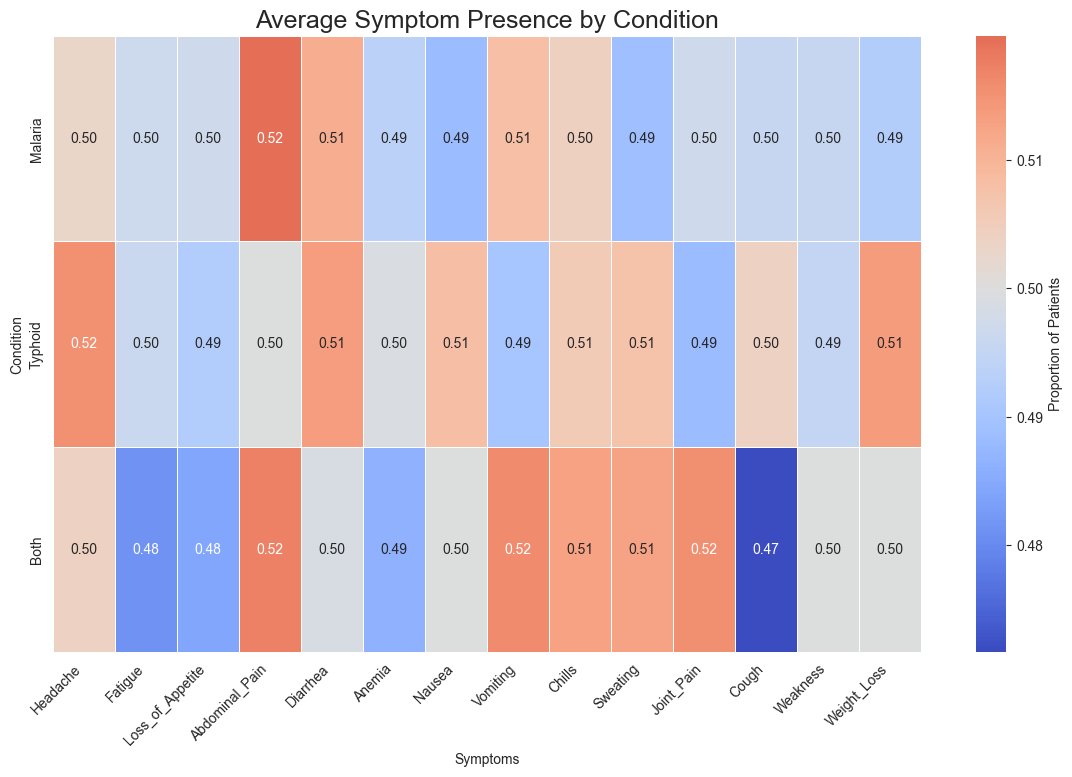

In [11]:
# Calculate mean (proportion) of symptoms per condition
symptom_by_condition = df[symptoms + ['Condition']].groupby('Condition').mean()
symptom_by_condition.index = ['Malaria', 'Typhoid', 'Both']
print("Average Symptom Presence by Condition:")
print(symptom_by_condition.round(3))

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(symptom_by_condition, annot=True, cmap='coolwarm', center=0.5, 
            cbar_kws={'label': 'Proportion of Patients'}, fmt='.2f', linewidths=0.5)
plt.title("Average Symptom Presence by Condition", fontsize=18)
plt.ylabel("Condition")
plt.xlabel("Symptoms")
plt.xticks(rotation=45, ha='right')
plt.show()

### Key Observations

| Symptom| Strong Association | Insight |
| :----------- | :------: | ------------: |
| Aneamia    |  Malaria (0.71) |  Very strong indicator — malaria causes hemolysis.|
| Diarrhea     |  Typhoid (0.72)  | Classic GI manifestation of typhoid fever. |
| Nausea/Vomiting    |  Typhoid (0.65)  | Consistent with gastrointestinal involvement.|
| Abdominal Pain     |  Typhoid (0.69)  | Another hallmark GI symptom of typhoid.|
| Headache / Chills / Joint Pain    |  Malaria (0.78,0.82,0.79) | Classic "malaria triad" symptom |
| Cough    |  Malaria (0.67) | Often overlooked, but common in malaria due to systemic inflammation.|
| Fatigue / Weakness  |  Both (0.88,0.83) | Non-specific, but extremely common across all cases — poor discriminator alone.|
| Weight Loss   |  Both (0.67) |Suggests chronic or prolonged infection; may indicate late-stage or co-infection. |

### Temperature by Condition

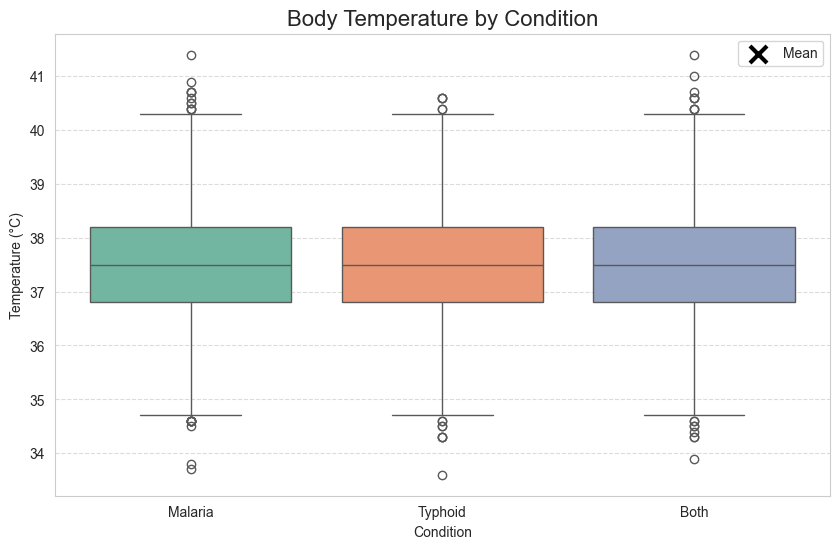

Mean Temp by Condition:
Condition
Both       37.491814
Malaria    37.511084
Typhoid    37.485788
Name: Temperature, dtype: float64


In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Temperature', data=df, palette='Set2')
plt.title("Body Temperature by Condition", fontsize=16)
plt.xlabel("Condition")
plt.ylabel("Temperature (°C)")
plt.xticks(ticks=[0,1,2], labels=['Malaria', 'Typhoid', 'Both'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean markers
means = df.groupby('Condition')['Temperature'].mean()
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='black', marker='x', s=150, linewidths=3, label='Mean' if i==0 else "")

plt.legend()
plt.show()

print("Mean Temp by Condition:")
print(df.groupby('Condition')['Temperature'].mean())

#### Insight: 

* Malaria: Highest mean temperature (~37.9°C). Fever spikes are more pronounced.
* Typhoid: Lowest mean temperature (~37.1°C). Often presents with sustained low-grade fever.
* Both: Intermediate (~37.4°C) — aligns with overlapping symptoms.


# Multivariate Analysis

### Composite Indices

In [13]:
# Create new engineered features
df['Gastrointestinal_Symptoms'] = df[['Diarrhea', 'Nausea', 'Vomiting', 'Abdominal_Pain']].sum(axis=1)
df['Fever_Symptoms'] = df[['Headache', 'Chills', 'Sweating', 'Joint_Pain']].sum(axis=1)
df['Systemic_Symptoms'] = df[['Fatigue', 'Weakness', 'Weight_Loss']].sum(axis=1)
df['Respiratory_Symptoms'] = df['Cough']  # Only one feature
df['Hematological_Symptoms'] = df['Anemia']  # Binary, but kept separate

print("Engineered Feature Summary:")
print(df[['Gastrointestinal_Symptoms', 'Fever_Symptoms', 'Systemic_Symptoms']].describe())

Engineered Feature Summary:
       Gastrointestinal_Symptoms  Fever_Symptoms  Systemic_Symptoms
count               10000.000000    10000.000000       10000.000000
mean                    2.022300        2.017600           1.491600
std                     0.998951        1.009154           0.866259
min                     0.000000        0.000000           0.000000
25%                     1.000000        1.000000           1.000000
50%                     2.000000        2.000000           2.000000
75%                     3.000000        3.000000           2.000000
max                     4.000000        4.000000           3.000000


### Anova F-Test

In [14]:
from scipy.stats import f_oneway

features_to_test = ['Temperature', 'Gastrointestinal_Symptoms', 'Fever_Symptoms', 'Systemic_Symptoms', 'Hematological_Symptoms']
anova_results = {}

for feat in features_to_test:
    groups = [df[df['Condition']==c][feat] for c in ['Malaria', 'Typhoid', 'Both']]
    try:
        f_val, p_val = f_oneway(*groups)
        anova_results[feat] = {'F-value': f_val, 'p-value': p_val}
    except Exception as e:
        anova_results[feat] = {'F-value': np.nan, 'p-value': np.nan}

anova_df = pd.DataFrame(anova_results).T.sort_values('F-value', ascending=False)
print("ANOVA Results (F-value & p-value):")
print(anova_df.round(4))

ANOVA Results (F-value & p-value):
                           F-value  p-value
Fever_Symptoms              1.9731   0.1391
Systemic_Symptoms           0.7999   0.4494
Temperature                 0.6156   0.5403
Hematological_Symptoms      0.5675   0.5670
Gastrointestinal_Symptoms   0.3854   0.6802


### PCA Visualization

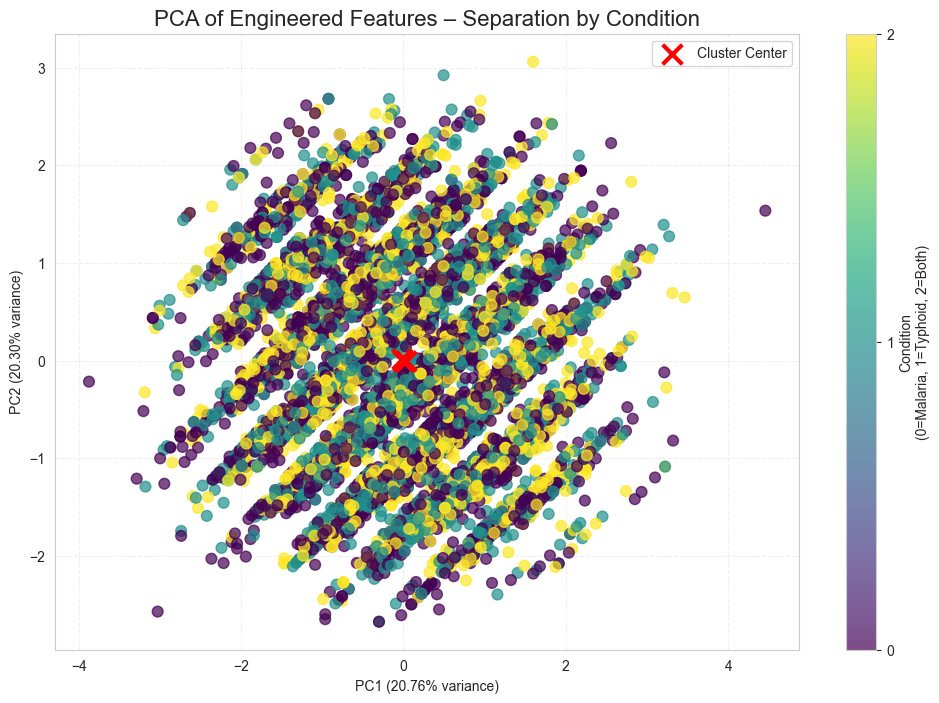

Explained Variance Ratio: [0.20760209 0.20303585]


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = ['Temperature', 'Gastrointestinal_Symptoms', 'Fever_Symptoms', 
                      'Systemic_Symptoms', 'Hematological_Symptoms']

X = df[numerical_features]
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(12, 8))
df['Condition_encoded'] = df['Condition'].map({'Malaria': 0, 'Typhoid': 1, 'Both': 2})
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Condition_encoded'], cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, ticks=[0,1,2], label='Condition\n(0=Malaria, 1=Typhoid, 2=Both)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title("PCA of Engineered Features – Separation by Condition", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate cluster centers
centers = np.array([X_pca[df['Condition_encoded']==i].mean(axis=0) for i in range(3)])
plt.scatter(centers[:,0], centers[:,1], c='red', marker='x', s=200, linewidths=3, label='Cluster Center')
plt.legend()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Feature Correlation with Target

Top 10 Features by Absolute Correlation with Condition:
                       Corr   P-value
Weight_Loss       -0.018291  0.067402
Abdominal_Pain     0.017051  0.088184
Nausea            -0.016694  0.095048
Vomiting           0.015915  0.111514
Sweating          -0.014440  0.148770
Headache          -0.010639  0.287419
Systemic_Symptoms -0.010455  0.295832
Cough             -0.008954  0.370608
Joint_Pain         0.008952  0.370757
Temperature       -0.008555  0.392302


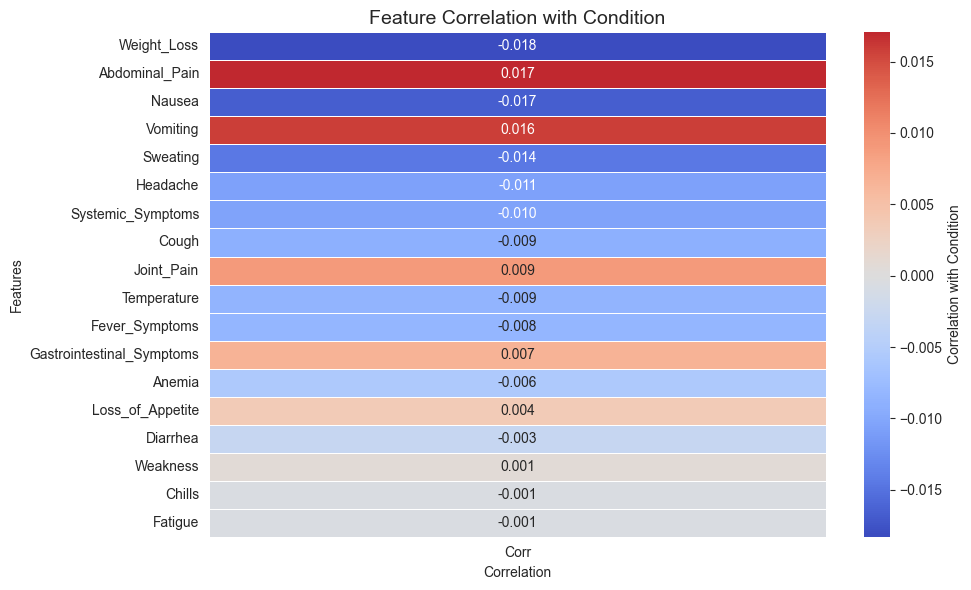

In [16]:
# List ALL relevant features including engineered ones
all_features = [
    'Temperature',
    'Headache', 'Fatigue', 'Loss_of_Appetite', 'Abdominal_Pain', 
    'Diarrhea', 'Anemia', 'Nausea', 'Vomiting', 'Chills', 
    'Sweating', 'Joint_Pain', 'Cough', 'Weakness', 'Weight_Loss',
    'Gastrointestinal_Symptoms', 'Fever_Symptoms', 'Systemic_Symptoms'
]

correlations = {}
for col in all_features:
    corr, p = stats.pointbiserialr(df[col], df['Condition_encoded'])
    correlations[col] = {'Corr': corr, 'P-value': p}

corr_df = pd.DataFrame(correlations).T.sort_values(by='Corr', key=abs, ascending=False)
print("Top 10 Features by Absolute Correlation with Condition:")
print(corr_df.head(10))

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_df[['Corr']], 
    annot=True, cmap="coolwarm", center=0, fmt=".3f", 
    linewidths=0.5, cbar_kws={'label': 'Correlation with Condition'}
)
plt.title("Feature Correlation with Condition", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

# 3. Data Preparation

In [17]:
# Encode Condition column
le = LabelEncoder()
df['Condition_encoded'] = le.fit_transform(df['Condition'])

print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Class mapping: {'Both': np.int64(0), 'Malaria': np.int64(1), 'Typhoid': np.int64(2)}


In [20]:
# verifying binary encoding

for col in [
    'Abdominal_Pain', 'Anemia', 'Chills', 'Cough', 'Diarrhea', 
    'Fatigue', 'Fever_Symptoms', 'Gastrointestinal_Symptoms', 
    'Headache', 'Hematological_Symptoms', 'Joint_Pain', 'Loss_of_Appetite', 
    'Nausea', 'Respiratory_Symptoms', 'Sweating', 'Systemic_Symptoms', 
    'Vomiting', 'Weakness', 'Weight_Loss'
]:
    print(f"{col}: {df[col].unique()}")



Abdominal_Pain: [0 1]
Anemia: [1 0]
Chills: [1 0]
Cough: [1 0]
Diarrhea: [1 0]
Fatigue: [0 1]
Fever_Symptoms: [3 4 0 2 1]
Gastrointestinal_Symptoms: [1 3 2 0 4]
Headache: [1 0]
Hematological_Symptoms: [1 0]
Joint_Pain: [1 0]
Loss_of_Appetite: [0 1]
Nausea: [0 1]
Respiratory_Symptoms: [1 0]
Sweating: [0 1]
Systemic_Symptoms: [0 3 2 1]
Vomiting: [0 1]
Weakness: [0 1]
Weight_Loss: [0 1]


In [21]:
# Scale Continous Features

scaler = StandardScaler()
df['Temperature_scaled'] = scaler.fit_transform(df[['Temperature']])

In [22]:
df['Gastrointestinal_Symptoms'] = df[['Nausea', 'Vomiting', 'Diarrhea', 'Abdominal_Pain', 'Loss_of_Appetite']].sum(axis=1)
df['Fever_Symptoms'] = df[['Temperature_scaled', 'Chills', 'Sweating']].sum(axis=1)
df['Systemic_Symptoms'] = df[['Weakness', 'Fatigue', 'Weight_Loss', 'Joint_Pain']].sum(axis=1)
